In [1]:
from pySLM import DLP9500, DMDSimulation
from pySLM.profile import GaussianTEM
import matplotlib.pyplot as plt
from scipy.constants import *
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['font.size'] = 20

In [3]:
dmd = DLP9500(369 * nano, 30 * milli, 2, - pi / 4)
sim = DMDSimulation(dmd, padding=0)

In [4]:
# Define the input_profile and output profile.
input_profile = GaussianTEM(0,0,1,8*milli,n=0,m=0)
out_profile = GaussianTEM(0,0,1,2*micro,n=1,m=1)

In [5]:
# Calculate the grating profile.
dmd.calculate_dmd_state(input_profile, out_profile)

/home/gilbert/pySLM/pySLM/slm.py:74: RuntimeWarning: divide by zero encountered in true_divide
  limiting_factor = 1/np.amin(np.abs(input_profile)/np.abs(E_out))


In [6]:
# Run the simulation.
sim.propagate_to_image(input_profile)

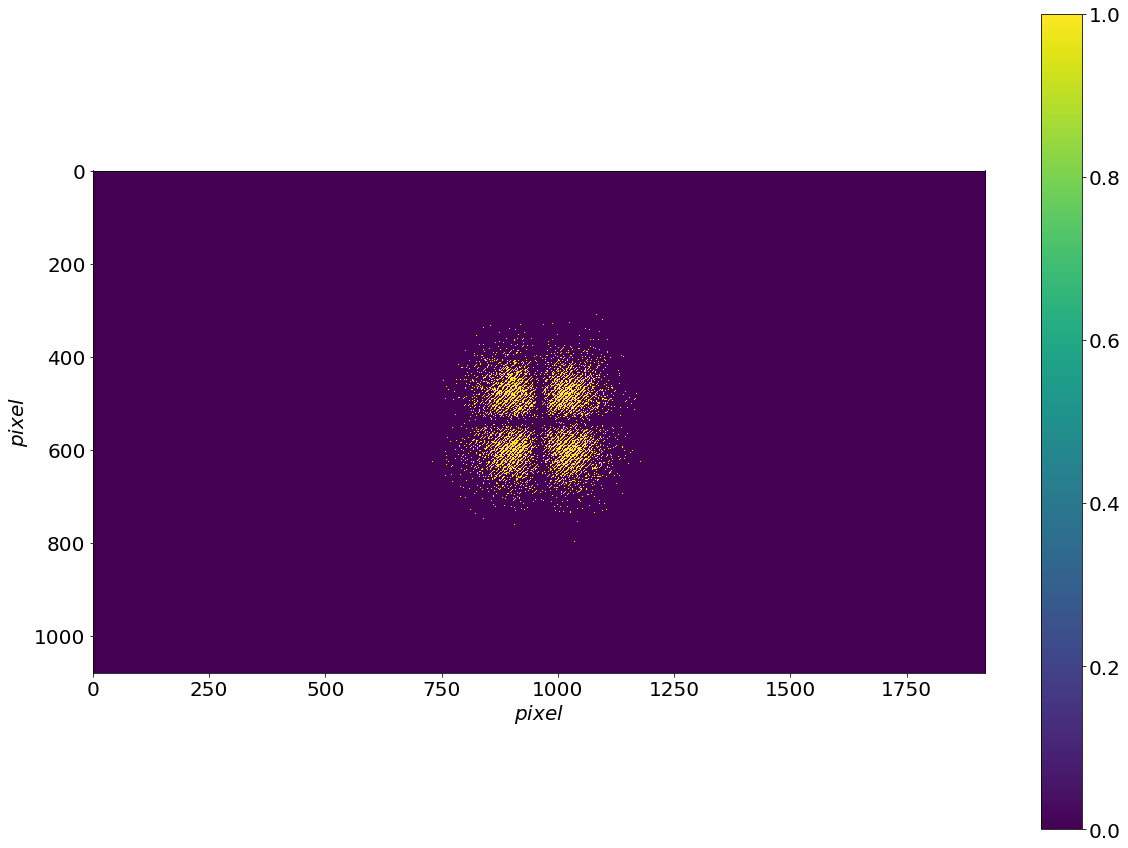

In [7]:
#The grating profile. (1=ON, 0=OFF)
plt.imshow(sim.dmd.dmd_state*1)
plt.xlabel(r"$pixel$")
plt.ylabel(r"$pixel$")
plt.colorbar()
plt.show()

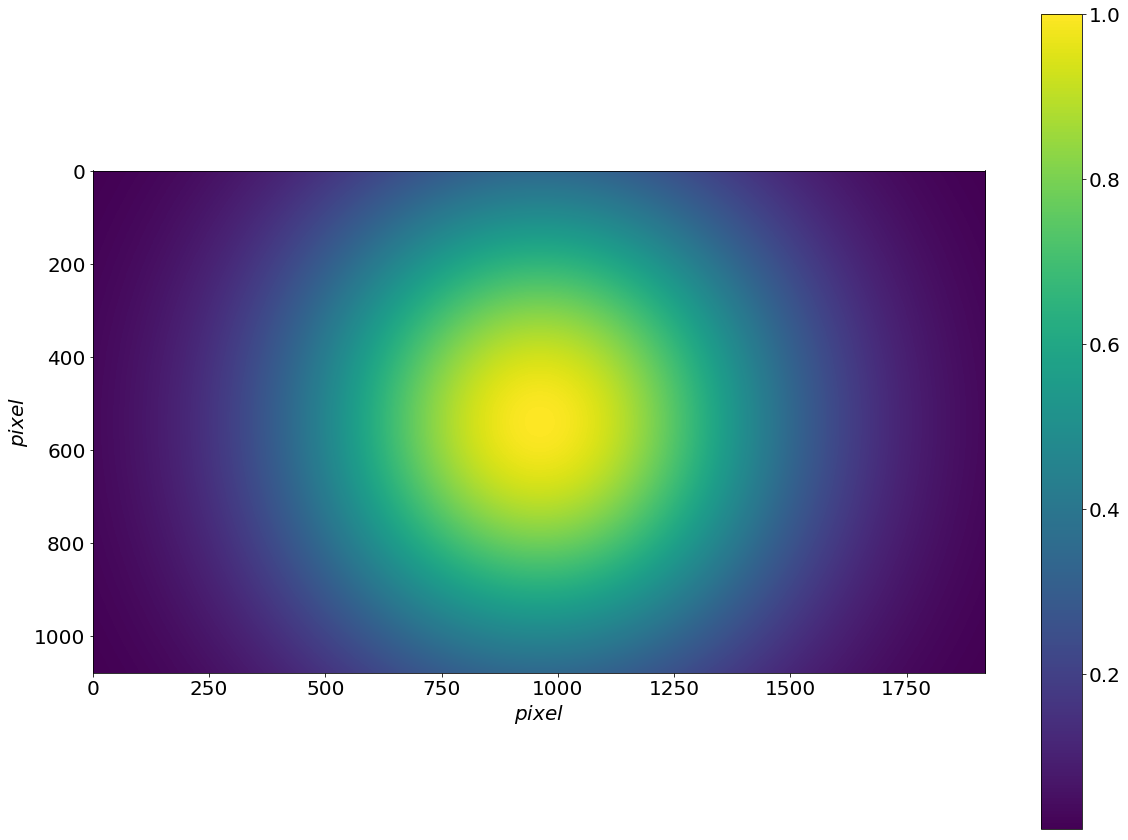

In [8]:
# The intensity map of the input profile of the light at Fourier plane (DMD position).
plt.imshow(sim.input_intensity)
plt.xlabel(r"$pixel$")
plt.ylabel(r"$pixel$")
plt.colorbar()
plt.show()

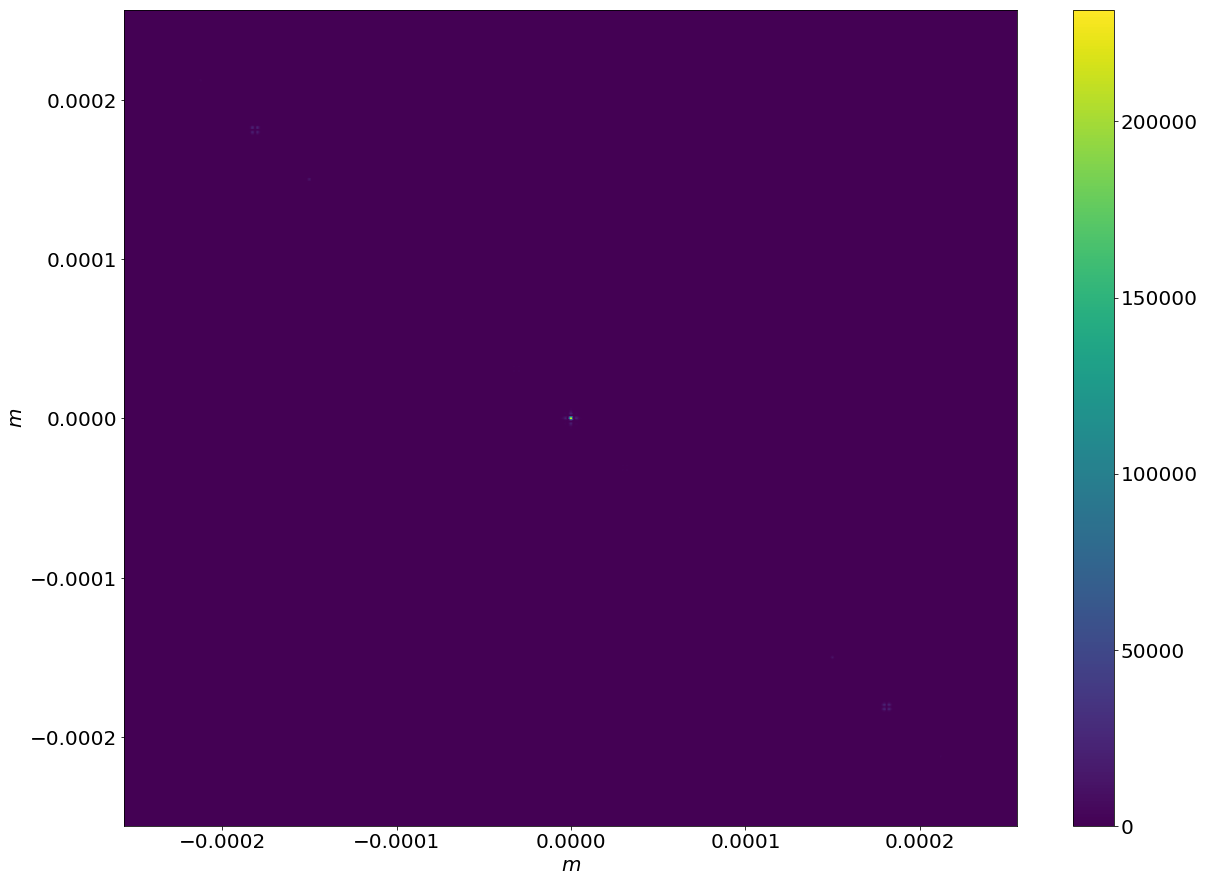

In [9]:
# The full intensity map of the light at image plane (atoms / ions position).
plt.pcolormesh(sim.xx_a, sim.yy_a, sim.image_plane_intensity)
plt.colorbar()
plt.xlabel(r"$m$")
plt.ylabel(r"$m$")
plt.show()

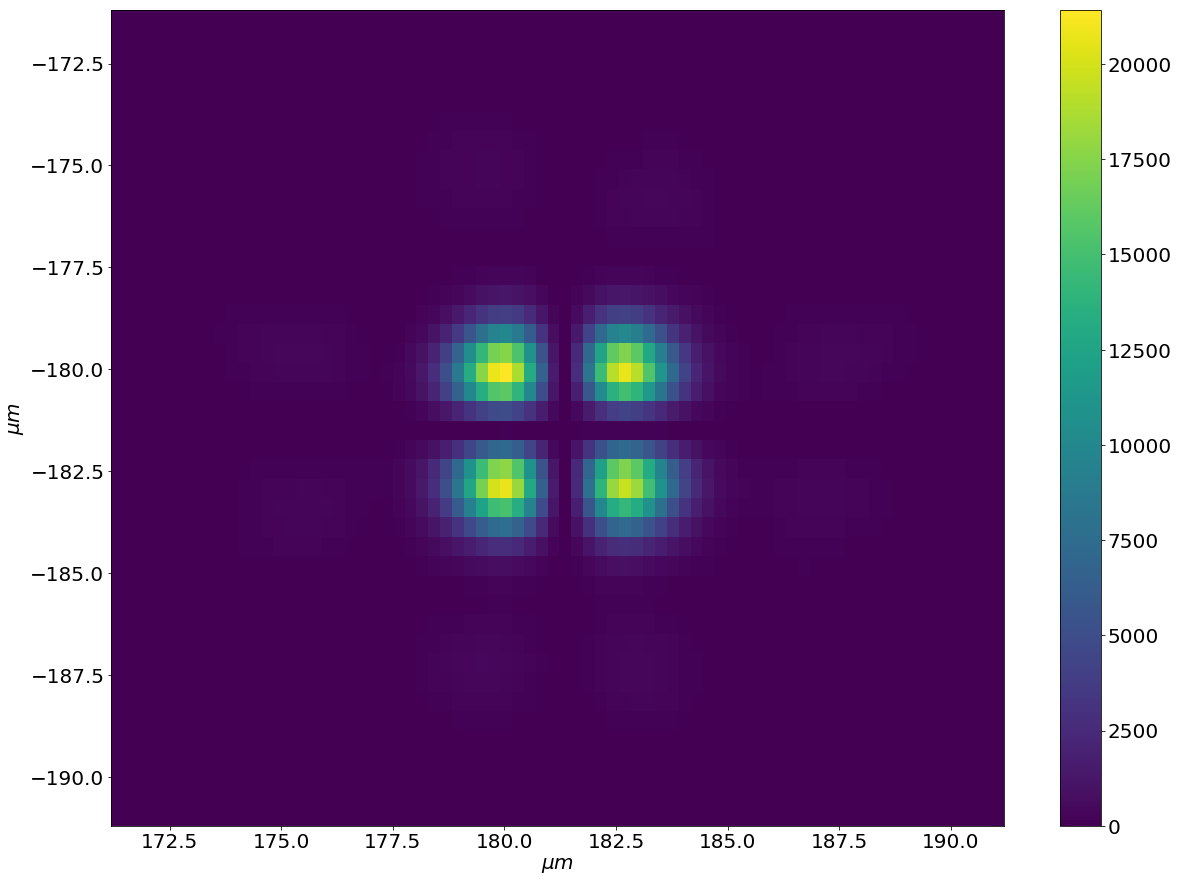

In [10]:
# The first order intensity map of the light at image plane (atoms / ions position).
xc, yc = sim.first_order_origin
sim.block_zeroth_order()
plt.pcolormesh(sim.xx_a/micro, sim.yy_a/micro, sim.image_plane_intensity)
plt.xlim(xc/micro-10, xc/micro + 10)
plt.ylim(yc/micro-10, yc/micro + 10)
plt.xlabel(r"$\mu m$")
plt.ylabel(r"$\mu m$")
plt.colorbar()
plt.show()